## Stocks Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in data science projects. It helps in understanding the underlying patterns and relationships in the data.


## Load the dataset 

Importing the libraries and loading the dataset below which was already stored in a .csv file. The data is collected through an API, for this project I am using the polygon API https://polygon.io/ and storing the data for 5 Tech stocks of US Stock Market 

In [30]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df_Stock=pd.read_csv(r'C:\Users\ajodh\Downloads\ctc_pyhton_ML\ML_Algos_AJ\StockAnalysisMLProject\Raw_Data\Microsoft_Data.csv')
column_names=["volume","volume weighted average price","open","close","high","low","timestamp","number_of_transactions","Date"]
df_Stock.columns=column_names # Renaming the columns
df_Stock['Date']=pd.to_datetime(df_Stock['Date'])

In [32]:
df_Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   volume                         493 non-null    float64       
 1   volume weighted average price  493 non-null    float64       
 2   open                           493 non-null    float64       
 3   close                          493 non-null    float64       
 4   high                           493 non-null    float64       
 5   low                            493 non-null    float64       
 6   timestamp                      493 non-null    int64         
 7   number_of_transactions         493 non-null    int64         
 8   Date                           493 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 34.8 KB


From the output, we can see that the dataset has 493 rows and 9 columns. All columns have non-null values.

## Data Cleaning 

In [33]:
from sklearn.preprocessing import StandardScaler

## Standardizing the data 

sc=StandardScaler()
df_Stock[["volume","volume weighted average price","open","close","high","low"]]=sc.fit_transform(df_Stock[["volume","volume weighted average price","open","close","high","low"]])

In [34]:
print(df_Stock.isnull().sum()) #checking for Null values
df_Stock

volume                           0
volume weighted average price    0
open                             0
close                            0
high                             0
low                              0
timestamp                        0
number_of_transactions           0
Date                             0
dtype: int64


,volume,volume weighted average price,open,close,high,low,timestamp,number_of_transactions,Date
0,-0.541960,-0.555772,-0.517695,-0.570161,-0.575915,-0.496408,1618804800000,293641,2021-04-19 04:00:00
1,-0.871836,-0.582764,-0.597202,-0.586320,-0.619012,-0.529572,1618891200000,281309,2021-04-20 04:00:00
2,-0.468051,-0.538809,-0.559629,-0.508217,-0.602851,-0.515712,1618977600000,272767,2021-04-21 04:00:00
3,-0.316341,-0.577802,-0.517024,-0.623015,-0.565814,-0.570139,1619064000000,368851,2021-04-22 04:00:00
4,-0.703755,-0.511757,-0.595189,-0.489028,-0.574905,-0.515035,1619150400000,248124,2021-04-23 04:00:00
...,...,...,...,...,...,...,...,...,...
488,-0.198405,0.069963,0.163645,0.023692,0.096769,0.101922,1679889600000,336991,2023-03-27 04:00:00
489,-0.667860,-0.057886,0.005638,-0.015023,-0.082317,-0.015550,1679976000000,288361,2023-03-28 04:00:00
490,-0.364288,0.146602,0.111982,0.162728,0.086025,0.199621,1680062400000,312671,2023-03-29 04:00:00
491,-0.367470,0.257359,0.288775,0.281903,0.197815,0.303405,1680148800000,338299,2023-03-30 04:00:00


In [35]:
## Dropping irrelevant columns since I will be using Time Series Forecasting I will only be using closing price as feature 
df1=df_Stock.drop(labels=['volume','volume weighted average price','open','high','low','timestamp','number_of_transactions'],axis=1)


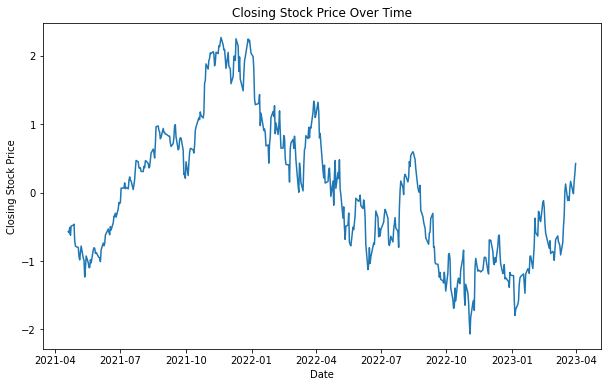

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='close', data=df1)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()